In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pymongo import MongoClient
from configparser import RawConfigParser

In [2]:
config_local = RawConfigParser()
config_local.read("config_local.conf")

['config_local.conf']

In [5]:
# Connect to the MongoDB server (default is localhost on port 27017)
client = MongoClient(config_local['MongoDB']['url'])

# Access a database (if it doesn't exist, MongoDB will create it)
db = client[config_local['MongoDB']['database']]

# Access a collection (a collection is like a table in relational databases)
collection = db[config_local['MongoDB']['collection']]

In [17]:
data_list = []

projection = {
    "timestamp": 1,  # Include the 'timestamp' field
    "data.name": 1,  # Include 'name' inside the 'data' array
    "data.priceUsd": 1,
    "_id": 0         # Exclude the '_id' field, as it bydefault takes _id in the data
}

# Perform the query with the projection
documents = collection.find({}, projection)

# Iterate over each document in the collection
for doc in documents:
    timestamp = doc.get("timestamp")
    if "data" in doc:
        # Iterate over each item in the 'data' array
        for data_item in doc["data"]:
          
            data_list.append({
                "timestamp": timestamp,
                "name": data_item["name"],
                "price": round(float(data_item["priceUsd"]), 3)
            })

df = pd.DataFrame(data_list)
df.head(10)

,timestamp,name,price
0,2024-11-10 20:29:47,Bitcoin,81408.554
1,2024-11-10 20:29:47,Ethereum,3175.646
2,2024-11-10 20:29:47,Tether,1.001
3,2024-11-10 20:29:47,BNB,632.654
4,2024-11-10 20:29:47,Solana,207.285
5,2024-11-10 20:29:47,Dogecoin,0.292
6,2024-11-10 20:29:47,USDC,1.000
7,2024-11-10 20:29:47,Lido Staked ETH,3161.390
8,2024-11-10 20:29:47,XRP,0.589
9,2024-11-10 20:29:47,Cardano,0.589


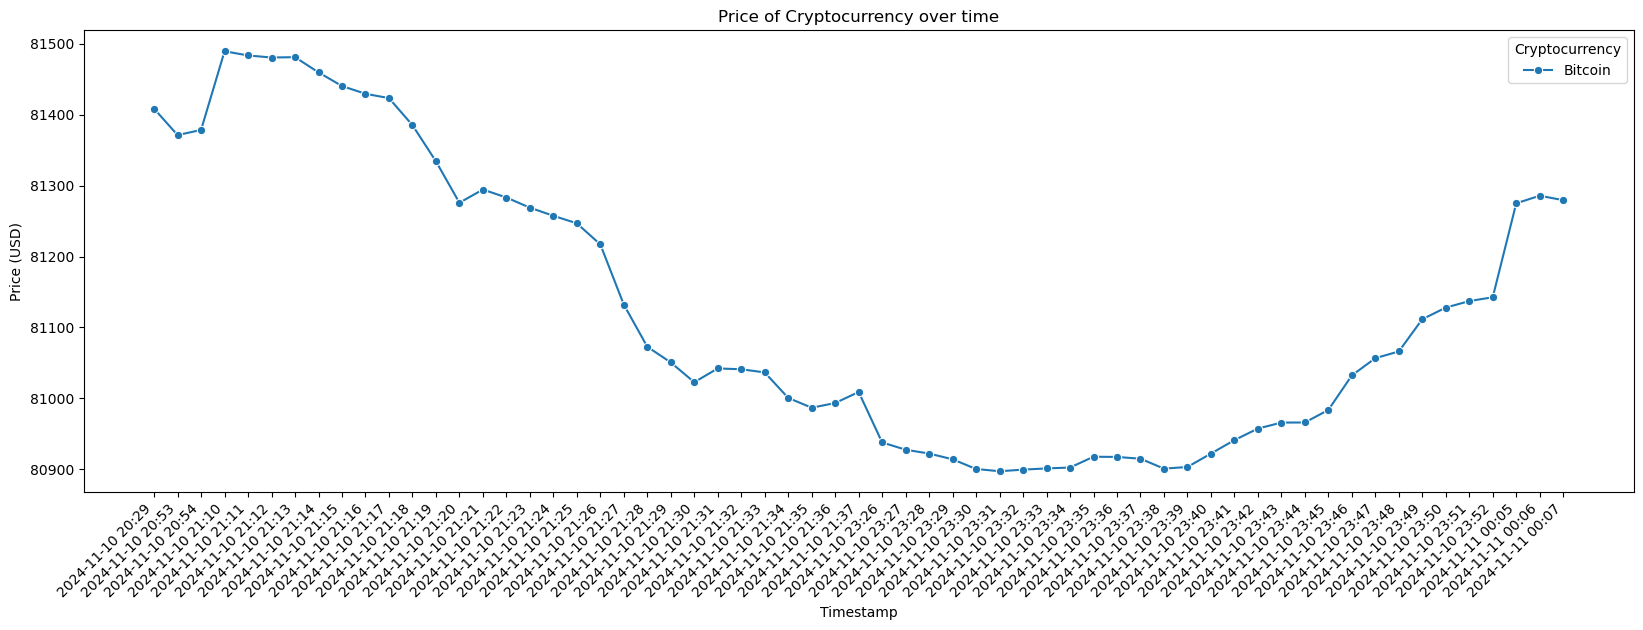

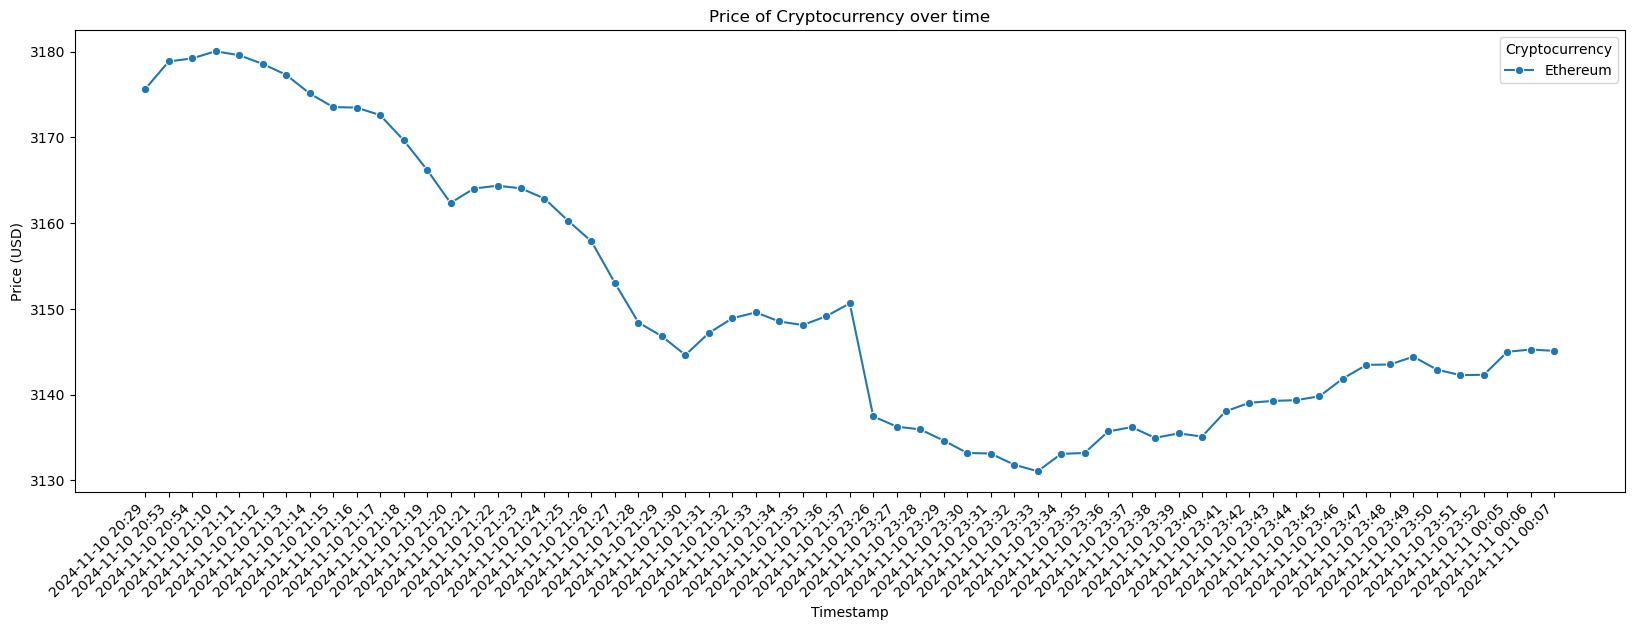

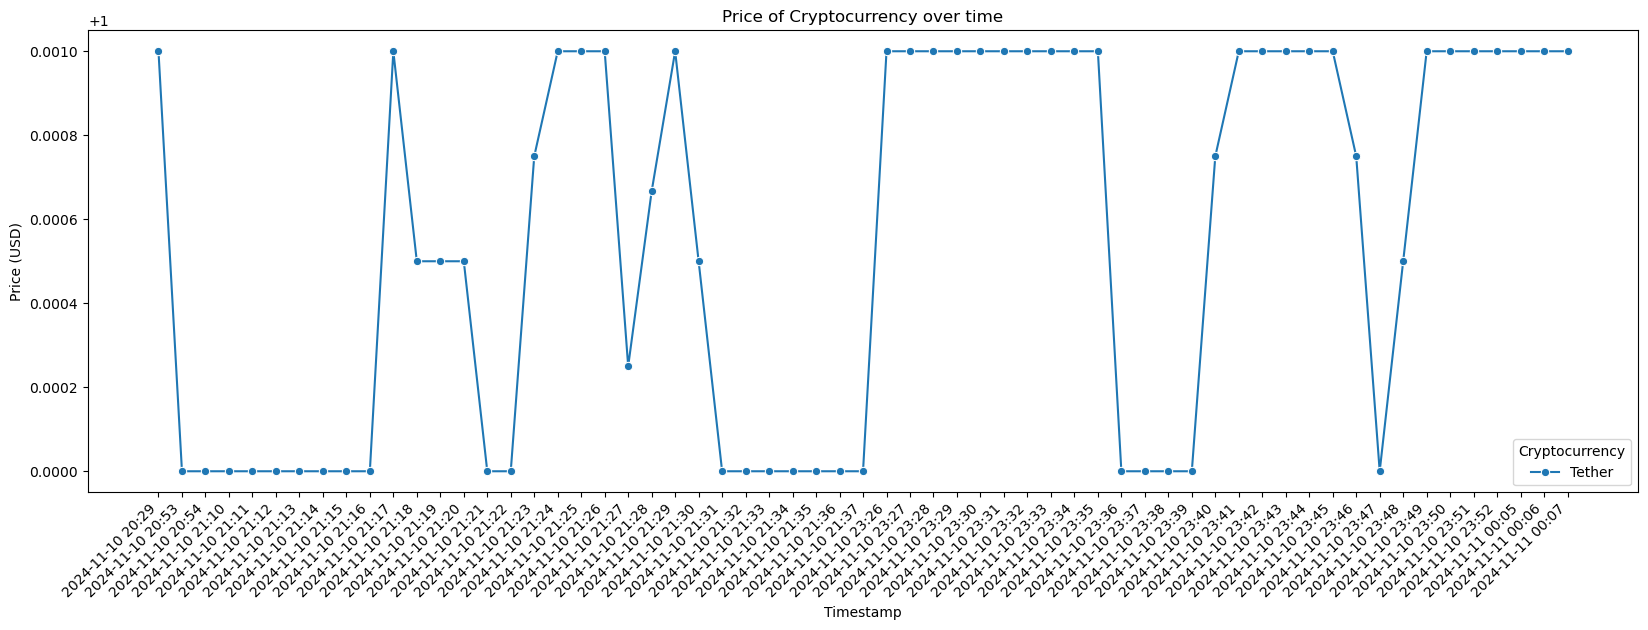

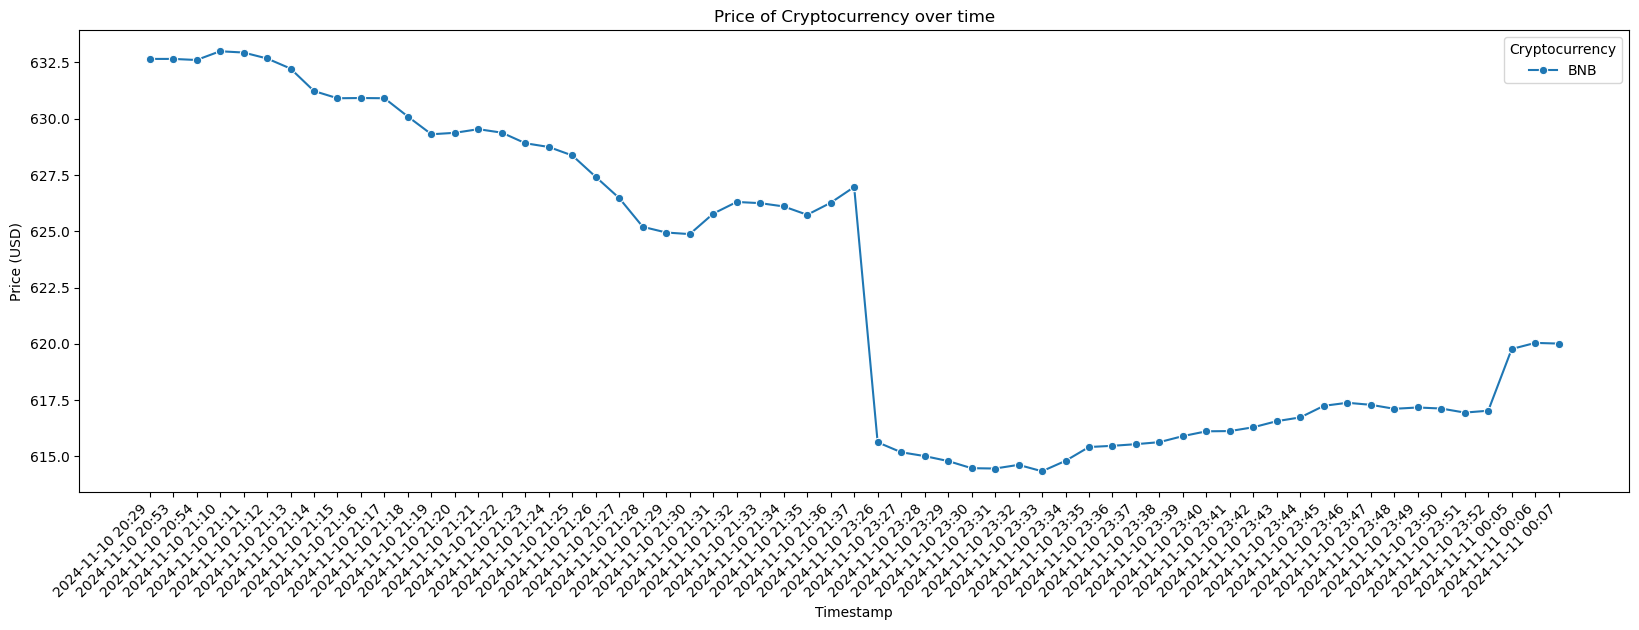

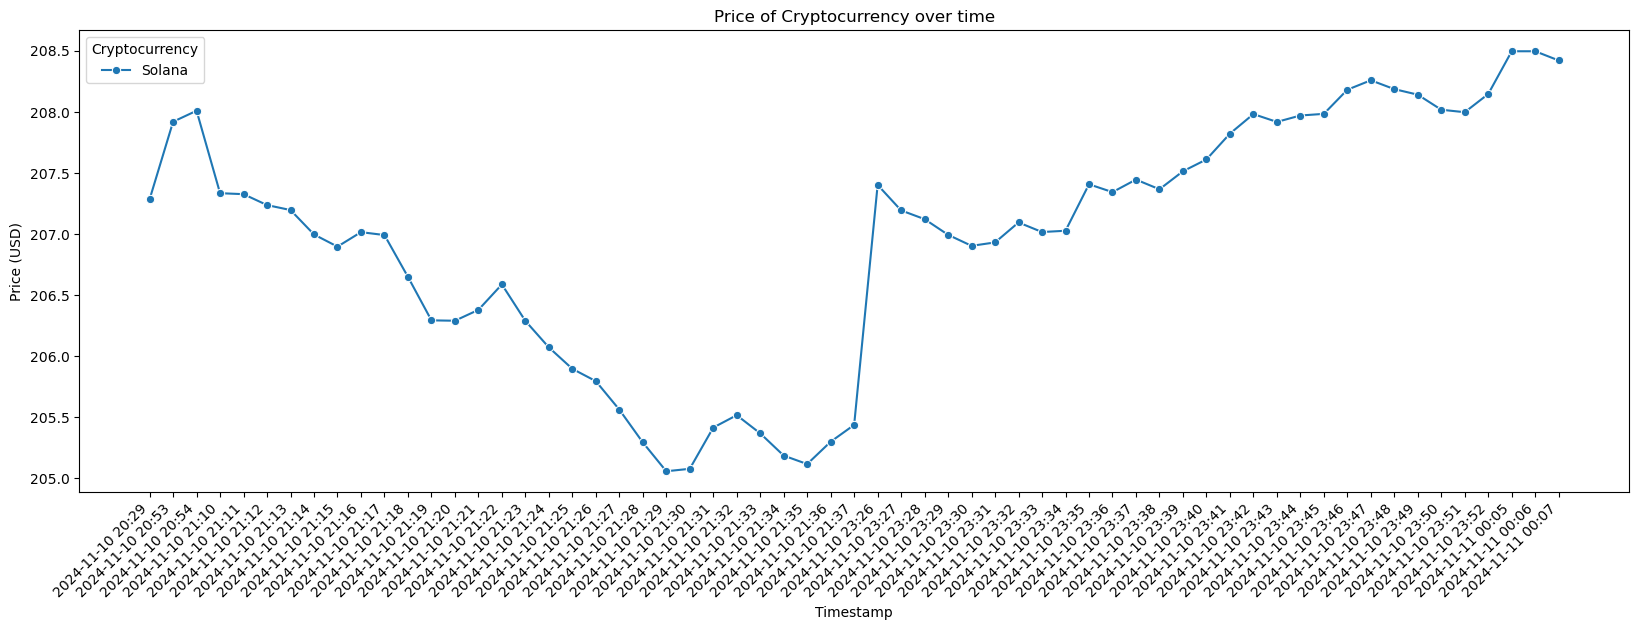

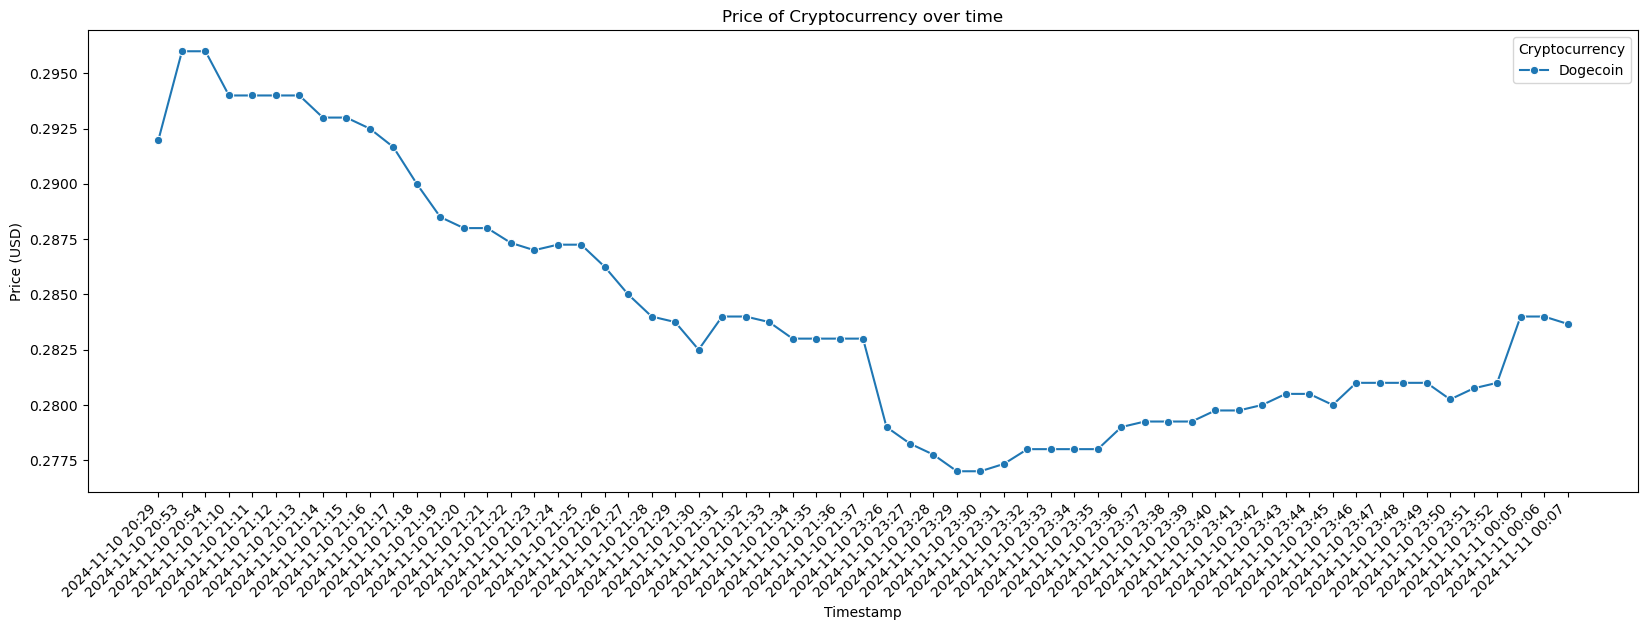

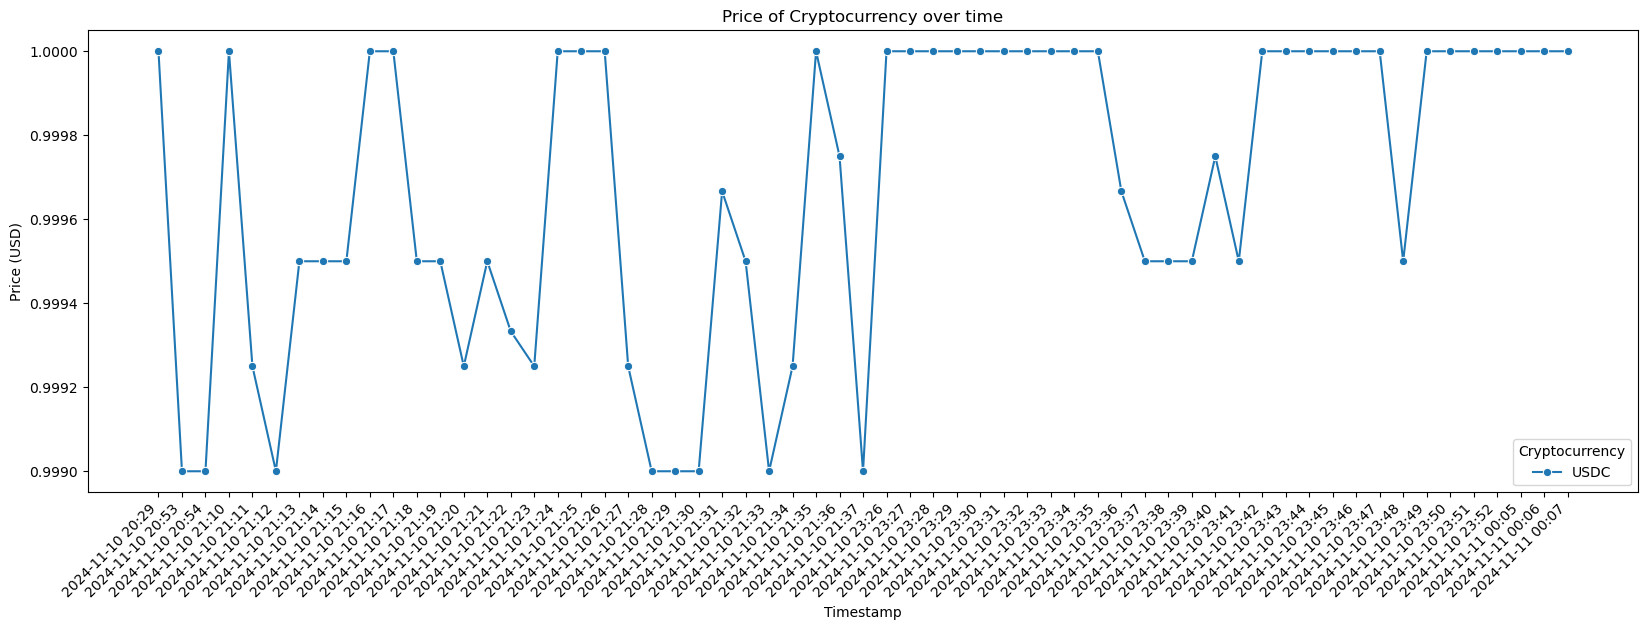

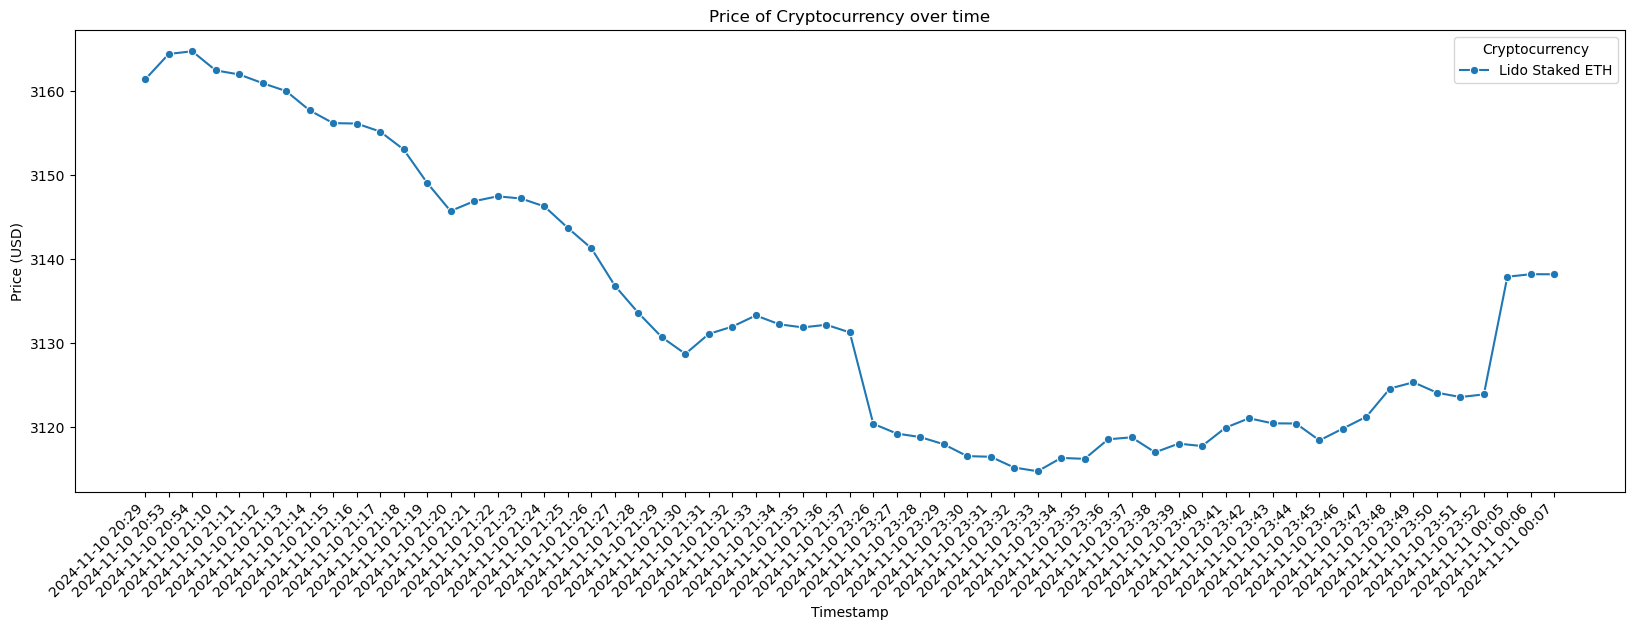

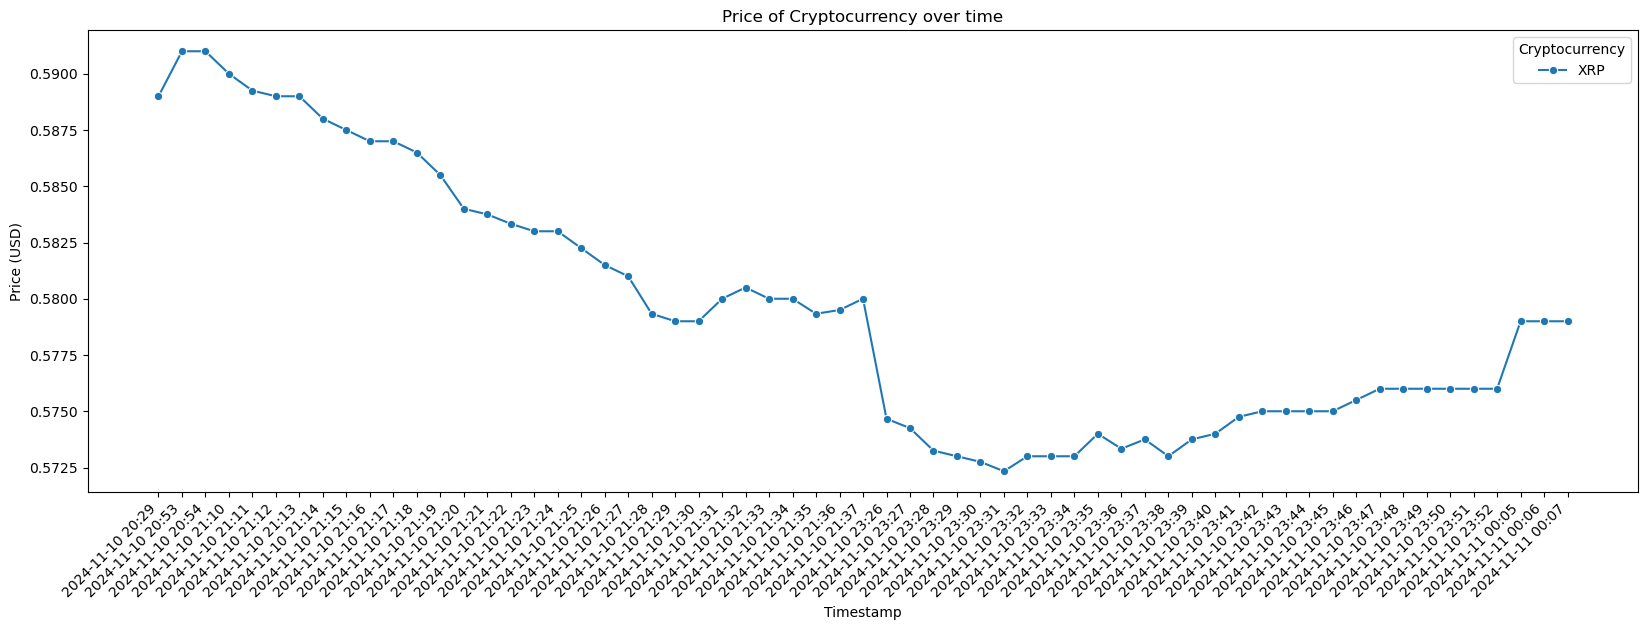

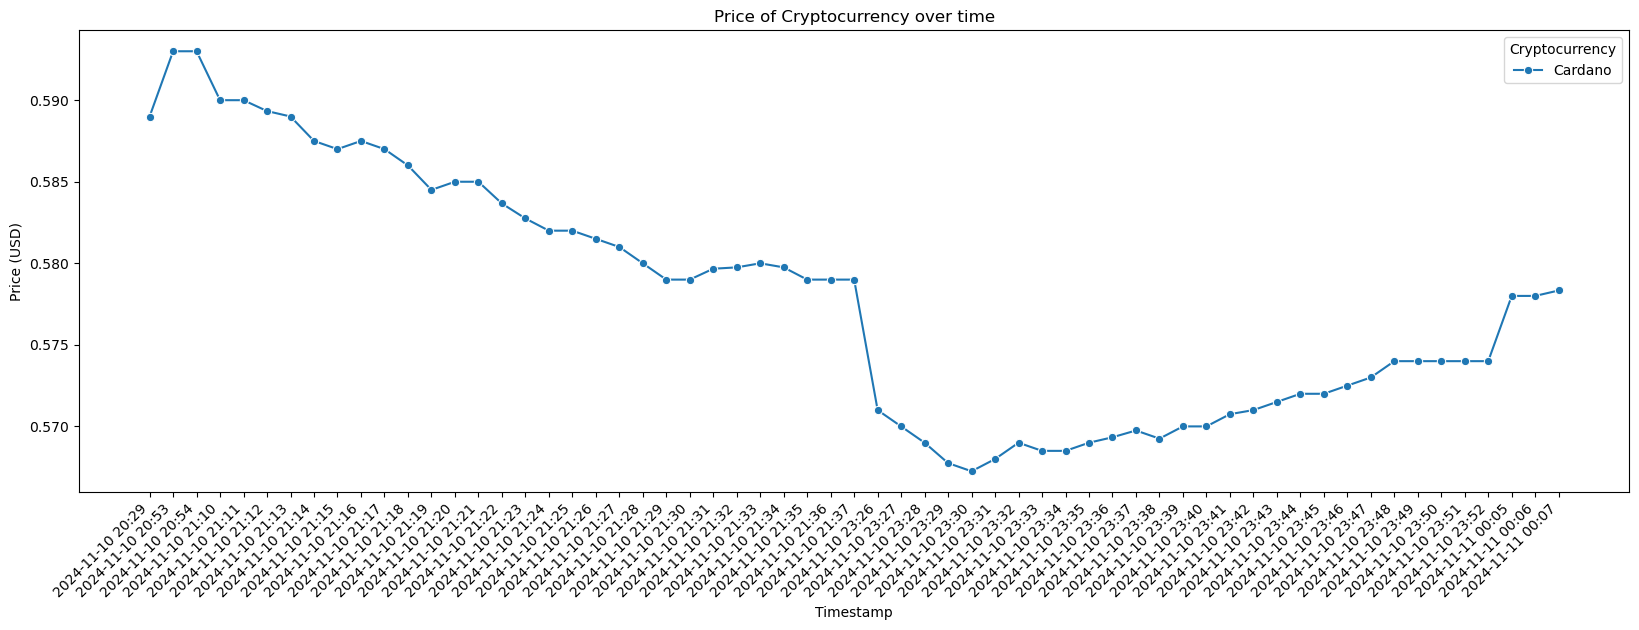

In [21]:
# Assuming df is your DataFrame
# First, convert timestamp to datetime if it's not already in datetime format
currencies = df['name'].unique()
for currency in currencies:
    df1 = df[df['name'] == currency].copy()
    df1['timestamp'] = pd.to_datetime(df1['timestamp'])
    
    
    # Extract minute from timestamp for grouping
    df1['time'] = df1['timestamp'].dt.strftime('%Y-%m-%d %H:%M')  # Format to group by minute
    
    # Now, let's plot the data for each cryptocurrency
    plt.figure(figsize=(20, 6))
    
    # Create a line graph for each cryptocurrency
    sns.lineplot(data=df1, x='time', y='price', marker='o', label=currency, errorbar=None)
    plt.legend(title="Cryptocurrency")
    
    # Rotate x-axis labels to make them readable
    plt.xticks(rotation=45, ha='right')
    
    # Add labels and title
    plt.xlabel('Timestamp')
    plt.ylabel('Price (USD)')
    plt.title('Price of Cryptocurrency over time')
    
    # Show the plot
    plt.show()
